# 클러스터링 분석

## K-means, GMM, Spectral, HDBSCAN 클러스터링 적용

## XAI 해석 (SHAP, LIME, Permutation Importance 적용)

### 사용할 라이브러리

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [6]:
# macOS에서 한글 폰트 설정
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스(-)가 깨질 수 있는 것을 방지함
plt.rcParams['axes.unicode_minus'] = False


### 데이터 불러오기 (window별 데이터)

In [7]:
# 절대경로로 불러옴
df_2020_2022 = pd.read_csv("../csv/financial_data_window_2020_2022.csv")
df_2021_2023 = pd.read_csv("../csv/financial_data_window_2021_2023.csv")
df_2022_2024 = pd.read_csv("../csv/financial_data_window_2022_2024.csv")

# 기업명을 따로 저장한 후, feature만 따로 분리함
company_2020_2022 = df_2020_2022['기업명_그룹']
company_2021_2023 = df_2021_2023['기업명_그룹']
company_2022_2024 = df_2022_2024['기업명_그룹']
X_raw_2020_2022 = df_2020_2022.drop(columns=["기업명_그룹"])
X_raw_2021_2023 = df_2021_2023.drop(columns=["기업명_그룹"])
X_raw_2022_2024 = df_2022_2024.drop(columns=["기업명_그룹"])

X_raw_2020_2022

,매출액,영업이익,당기순이익,자산총계,자본총계,자본금,영업활동현금흐름,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,EPS(원),PER(배),BPS(원),PBR(배),발행주식수(보통주)
0,70985.166667,2197.000000,1664.000000,2.733767e+04,8672.000000,173.0,5791.166667,7519.166667,3.071667,2.326667,20.556667,6.370000,216.680000,9629.666667,18.258333,50201.166667,3.486667,17283906.0
1,65153.666667,10667.500000,7884.333333,1.302548e+06,104070.666667,16297.0,13934.833333,188141.666667,16.550000,12.281667,8.033333,0.630000,1150.475000,2278.500000,3.096667,29234.333333,0.236667,325935246.0
2,372903.000000,19360.833333,6464.000000,4.477637e+05,169206.666667,1790.0,36457.000000,181936.166667,5.175000,1.726667,4.171667,1.501667,164.290000,5808.000000,17.345000,150724.833333,0.565000,29176998.0
3,116434.333333,3747.500000,1749.333333,9.451867e+04,40292.666667,1141.0,5215.333333,32803.333333,3.213333,1.496667,3.723333,1.875000,134.561667,5678.333333,28.503333,176992.666667,0.658333,22812344.0
4,278437.666667,15670.833333,8298.833333,2.822718e+05,110611.666667,819.0,17094.166667,106516.166667,5.633333,3.008333,10.466667,3.048333,154.990000,37635.166667,10.200000,392853.166667,0.983333,15054186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,169082.333333,11569.000000,8470.166667,4.893132e+05,72241.666667,447.0,9939.333333,11728.833333,7.235000,5.293333,13.046667,1.703333,665.428333,9474.166667,3.616667,91999.166667,0.303333,89400000.0
187,42520.500000,478.666667,-632.833333,2.837017e+04,5662.000000,2000.0,1157.333333,16159.000000,0.873333,-1.751667,-9.115000,-2.041667,402.983333,-1582.166667,3.356680,14950.833333,5.455000,39248121.0
188,32839.500000,1189.833333,368.333333,4.304900e+04,10586.666667,466.0,677.500000,14398.833333,3.580000,1.130000,2.238333,0.911667,305.755000,2210.333333,34.394582,101515.833333,0.678333,9324548.0
189,81669.500000,5808.000000,3736.166667,4.139467e+04,14648.500000,216.0,4552.666667,14565.000000,7.075000,4.560000,30.030000,10.281667,193.871667,65943.333333,67.425000,274582.666667,1.400000,4327682.0


### featurer scaling 수행

In [8]:
# StandardScaler로 정규화한다.
scaler = StandardScaler()
X_scaled_2020_2022 = scaler.fit_transform(X_raw_2020_2022)
X_scaled_2021_2023 = scaler.fit_transform(X_raw_2021_2023)
X_scaled_2022_2024 = scaler.fit_transform(X_raw_2022_2024)
# X_scaled 데이터를 DataFrame으로 변환
X_scaled_df_2020_2022 = pd.DataFrame(X_scaled_2020_2022, columns=X_raw_2020_2022.columns)
X_scaled_df_2021_2023 = pd.DataFrame(X_scaled_2021_2023, columns=X_raw_2021_2023.columns)
X_scaled_df_2022_2024 = pd.DataFrame(X_scaled_2022_2024, columns=X_raw_2022_2024.columns)

# CSV 파일로 저장
# X_scaled_df_2020_2022.to_csv("../csv/X_scaled_2020_2022.csv", index=False, encoding="utf-8-sig")
# X_scaled_df_2021_2023.to_csv("../csv/X_scaled_2021_2023.csv", index=False, encoding="utf-8-sig")
# X_scaled_df_2022_2024.to_csv("../csv/X_scaled_2022_2024.csv", index=False, encoding="utf-8-sig")

# print("X_scaled 데이터가 'X_scaled.csv'로 저장되었습니다.")

### 클러스터링 적용 및 평가 함수 정의

In [9]:
# 클러스터링 성능 평가 함수를 정의함 
# Silhouette Score를 사용함
def evaluate_clustering(model, X, labels=None):
    if (labels is None):
        labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return labels, score

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2020-2022) - 그래프

In [10]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_scaled_df_2020_2022)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
3,당기순이익,23.237646
2,영업이익,22.286116
5,자본총계,12.369585
14,EPS(원),8.917612
1,매출액,8.309715
16,BPS(원),8.092324
4,자산총계,7.685596
8,이자발생부채,6.880909
6,자본금,5.025774
11,ROE(%),4.545957


In [11]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 피처들만 남긴 새로운 DataFrame 생성
X_scaled_df_2020_2022 = X_scaled_df_2020_2022[valid_features]


Best K for KMeans (lowest DBI): 26 -> DBI = 0.6691
Best K for GMM (lowest DBI): 26 -> DBI = 0.7265
Best K for Spectral Clustering (lowest DBI): 26 -> DBI = 1.4014


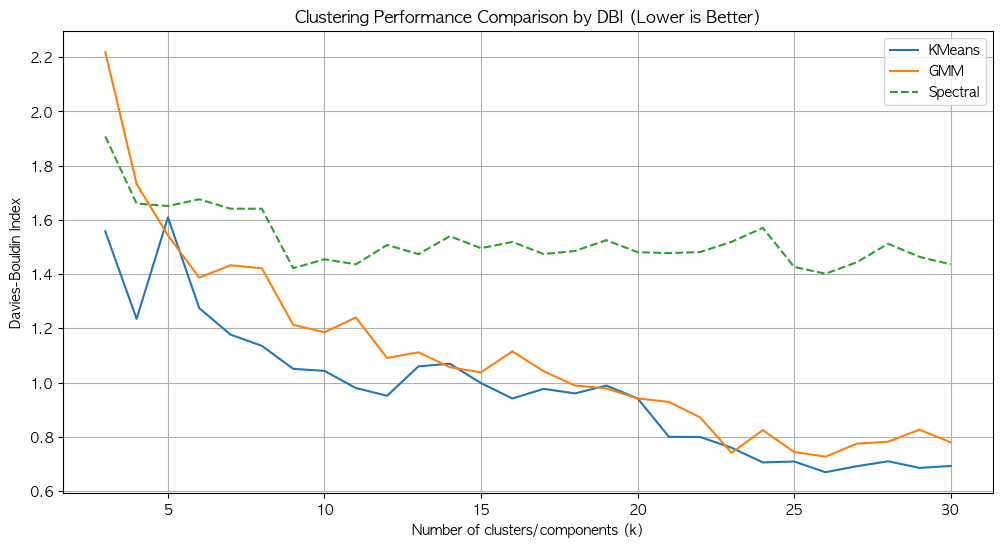

In [12]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2020_2022 = kmeans.fit_predict(X_scaled_2020_2022)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022))
    labels_kmeans_all[k] = kmeans_labels_2020_2022

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2020_2022 = gmm.fit_predict(X_scaled_df_2020_2022)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022))
    labels_gmm_all[k] = gmm_labels_2020_2022

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2020_2022 = spectral.fit_predict(X_scaled_df_2020_2022)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022))
        labels_spectral_all[k] = spectral_labels_2020_2022

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering 적용 및 비교

In [13]:
# # Window 2020-2022

# # K-means clustering
# # K-means는 k=26에서 가장 높은 점수를 보임
# kmeans = KMeans(n_clusters=26, random_state=42)
# kmeans_labels_2020_2022, kmeans_score_2020_2022 = evaluate_clustering(kmeans, X_scaled_df_2020_2022)

# # GMM
# # GMM은 k=29에서 가장 높은 점수를 보임
# gmm = GaussianMixture(n_components=26, random_state=42)
# gmm_labels_2020_2022, gmm_score_2020_2022 = evaluate_clustering(gmm, X_scaled_df_2020_2022, labels=gmm.fit_predict(X_scaled_df_2020_2022))

# # Spectral clustering
# # Spectral clustering은 거의 모든 k의 범위에서 평가가 낮게 나옴
# spectral = SpectralClustering(n_clusters=29, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2020_2022, spectral_score_2020_2022 = evaluate_clustering(spectral, X_scaled_df_2020_2022)


# # Davies-Bouldin Index 계산
# # 보통 0.5 ~ 1.0 사이면 괜찮은 클러스터링이라고 함. 실무에서 자주 나오는 수준
# kmeans_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022)
# gmm_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022)
# spectral_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022)

# # 결과 비교 출력
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2020_2022:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2020_2022:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2020_2022:.4f}")

# # # 결과 비교
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### 최종적으로 선택한 클러스터 결과 저장 (K-means)

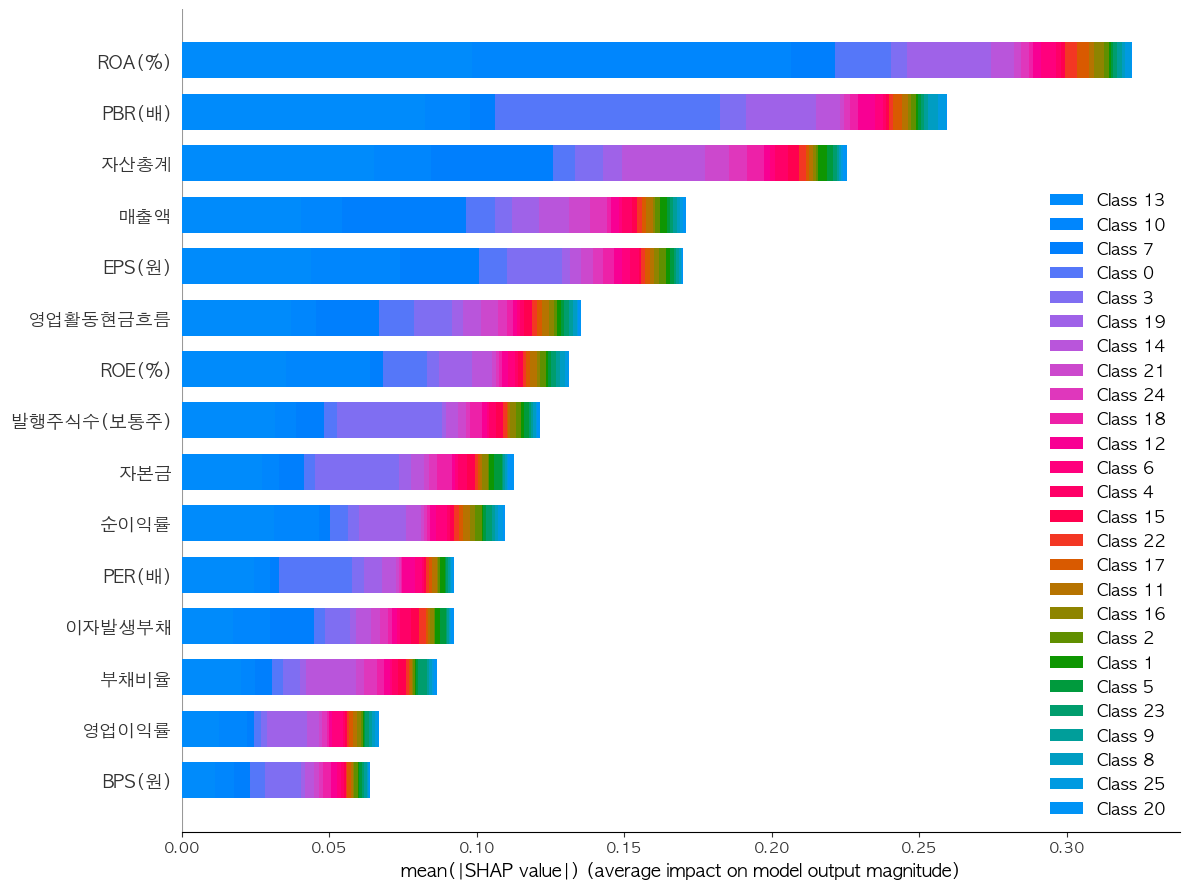

실제 사용된 클러스터 수: 26


In [14]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2020_2022['Cluster'] = final_labels

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2020_2022, final_labels)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2020_2022 = explainer.shap_values(X_scaled_df_2020_2022)

# ✅ summary plot
shap.summary_plot(shap_values_2020_2022, X_scaled_df_2020_2022, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels)))


In [15]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2020_2022 = {}
unique_clusters = np.unique(final_labels)

for cluster_id in unique_clusters:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2020_2022[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2020_2022.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2020_2022[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2020_2022.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters:
    shap_arr = cluster_shap_means_2020_2022[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2020_2022.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2020_2022.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21,Class 22,Class 23,Class 24,Class 25
매출액,0.034649,0.005724,0.002190,0.006032,0.007635,0.007906,0.002100,0.008788,0.029486,0.010690,...,0.002804,0.014806,0.006315,0.011069,0.008203,0.007890,0.002613,0.002700,0.007606,0.010020
자산총계,0.035716,0.007165,0.002623,0.004873,0.009444,0.012711,0.004747,0.006785,0.001380,0.000875,...,0.000211,0.009462,0.009043,0.004362,0.011815,0.005690,0.004156,0.000892,0.011555,0.008834
자본금,0.013728,0.005156,0.000406,0.011849,0.005571,0.012579,0.001967,0.001106,0.016445,0.001640,...,0.004033,0.003790,0.009804,0.001476,0.009338,0.002390,0.001360,0.002008,0.000965,0.003498
영업활동현금흐름,0.041545,0.014381,0.001085,0.015329,0.009962,0.009960,0.004829,0.013154,0.012986,0.010633,...,0.008522,0.017874,0.013560,0.008068,0.010192,0.014308,0.008137,0.010250,0.015878,0.015531
이자발생부채,0.016422,0.003418,0.000048,0.003389,0.005814,0.007796,0.002369,0.002732,0.008296,0.002884,...,0.001746,0.001804,0.002762,0.003768,0.007865,0.003195,0.001425,0.004894,0.003348,0.003605
영업이익률,0.009153,0.000312,0.001476,0.001161,0.000225,0.000880,0.004238,0.000729,0.011225,0.009770,...,0.000711,0.011898,0.000571,0.007100,0.000308,0.000536,0.000656,0.002044,0.000723,0.018458
순이익률,0.021683,0.001962,0.000461,0.002848,0.001785,0.000274,0.017603,0.001265,0.027266,0.007443,...,0.005422,0.033023,0.000630,0.024516,0.002191,0.001346,0.005607,0.009615,0.001315,0.031807
ROE(%),0.051749,0.004490,0.007549,0.010962,0.002434,0.011170,0.032353,0.005386,0.012614,0.003825,...,0.008146,0.074805,0.003629,0.037252,0.003531,0.005372,0.008945,0.023238,0.007850,0.045873
ROA(%),0.056275,0.005384,0.005450,0.009395,0.005314,0.005730,0.057624,0.006177,0.019458,0.009175,...,0.014090,0.141496,0.005415,0.067556,0.006753,0.004717,0.015082,0.007983,0.005688,0.096869
부채비율,0.017602,0.001735,0.001435,0.003308,0.002675,0.003908,0.002111,0.001273,0.023620,0.002418,...,0.000460,0.004400,0.002308,0.004550,0.000303,0.002562,0.001109,0.000677,0.002093,0.009569



Class 0에 중요한 특성 순위:
1. PBR(배): 0.324270
2. PER(배): 0.094356
3. ROA(%): 0.056275
4. ROE(%): 0.051749
5. 영업활동현금흐름: 0.041545
6. EPS(원): 0.036303
7. 자산총계: 0.035716
8. 매출액: 0.034649
9. 순이익률: 0.021683
10. BPS(원): 0.020099
11. 부채비율: 0.017602
12. 발행주식수(보통주): 0.017258
13. 이자발생부채: 0.016422
14. 자본금: 0.013728
15. 영업이익률: 0.009153

Class 1에 중요한 특성 순위:
1. PBR(배): 0.035213
2. 영업활동현금흐름: 0.014381
3. PER(배): 0.009541
4. EPS(원): 0.009178
5. 자산총계: 0.007165
6. 매출액: 0.005724
7. 발행주식수(보통주): 0.005638
8. ROA(%): 0.005384
9. 자본금: 0.005156
10. ROE(%): 0.004490
11. 이자발생부채: 0.003418
12. 순이익률: 0.001962
13. 부채비율: 0.001735
14. BPS(원): 0.001367
15. 영업이익률: 0.000312

Class 2에 중요한 특성 순위:
1. PBR(배): 0.052173
2. PER(배): 0.023898
3. EPS(원): 0.014503
4. ROE(%): 0.007549
5. ROA(%): 0.005450
6. BPS(원): 0.003424
7. 자산총계: 0.002623
8. 매출액: 0.002190
9. 발행주식수(보통주): 0.002080
10. 영업이익률: 0.001476
11. 부채비율: 0.001435
12. 영업활동현금흐름: 0.001085
13. 순이익률: 0.000461
14. 자본금: 0.000406
15. 이자발생부채: 0.000048

Class 3에 중요한 특성 순위:
1. PBR(배): 0.046725

### 위에 결과를 보면 각 class 별로 잘 주요한 feature가 나온 것을 확인할 수 있다.

### 각 cluster에 어떤 종목이 포함되어 있는지 확인

In [16]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2020_2022[final_labels == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
LG에너지솔루션, SK아이이테크놀로지, 대한전선, 두산퓨얼셀, 씨에스윈드, 엘앤에프, 일진하이솔루스, 카카오페이, 코스모신소재, 코스모화학, 포스코퓨처엠, 하이브, 한미사이언스, 한미약품, 한전기술, 호텔신라
[클러스터 1에 속한 종목들]:
현대차
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
KT, LG디스플레이, LG유플러스, NH투자증권, 금호타이어, 대우건설, 대한항공, 두산에너빌리티, 삼성중공업, 카카오뱅크, 팬오션, 한온시스템
[클러스터 4에 속한 종목들]:
KB금융, 신한지주
[클러스터 5에 속한 종목들]:
한국전력
[클러스터 6에 속한 종목들]:
F&F, 에스디바이오센서
[클러스터 7에 속한 종목들]:
CJ, CJ제일제당, DB손해보험, GS, HD현대, LG전자, LG화학, S-Oil, SK이노베이션, SK텔레콤, 메리츠금융지주, 삼성SDI, 삼성물산, 삼성화재, 이마트, 현대모비스, 현대제철
[클러스터 8에 속한 종목들]:
하나투어
[클러스터 9에 속한 종목들]:
GKL
[클러스터 10에 속한 종목들]:
BGF리테일, KT&G, LG, LG생활건강, LG이노텍, LX인터내셔널, OCI홀딩스, SK케미칼, 고려아연, 금호석유화학, 동서, 롯데정밀화학, 미스토홀딩스, 삼성E&A, 삼성에스디에스, 삼성전기, 삼양식품, 세아제강지주, 영원무역, 영원무역홀딩스, 오뚜기, 오리온, 카카오, 코웨이, 현대글로비스, 효성티앤씨
[클러스터 11에 속한 종목들]:
한진칼
[클러스터 12에 속한 종목들]:
HS효성첨단소재, 한올바이오파마
[클러스터 13에 속한 종목들]:
CJ대한통운, DL, DL이앤씨, GS건설, GS리테일, HD한국조선해양, HD현대미포, HD현대인프라코어, HD현대일렉트릭, HL만도, KCC, KG모빌리티, LIG넥스원, LS, LS ELECTRIC, SKC, SK네트웍스, SK스퀘어, TCC스틸, TKG휴켐스, 강원랜드, 넷마블, 녹십자, 녹십자홀딩스, 농심, 대상, 대웅, 대웅제

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

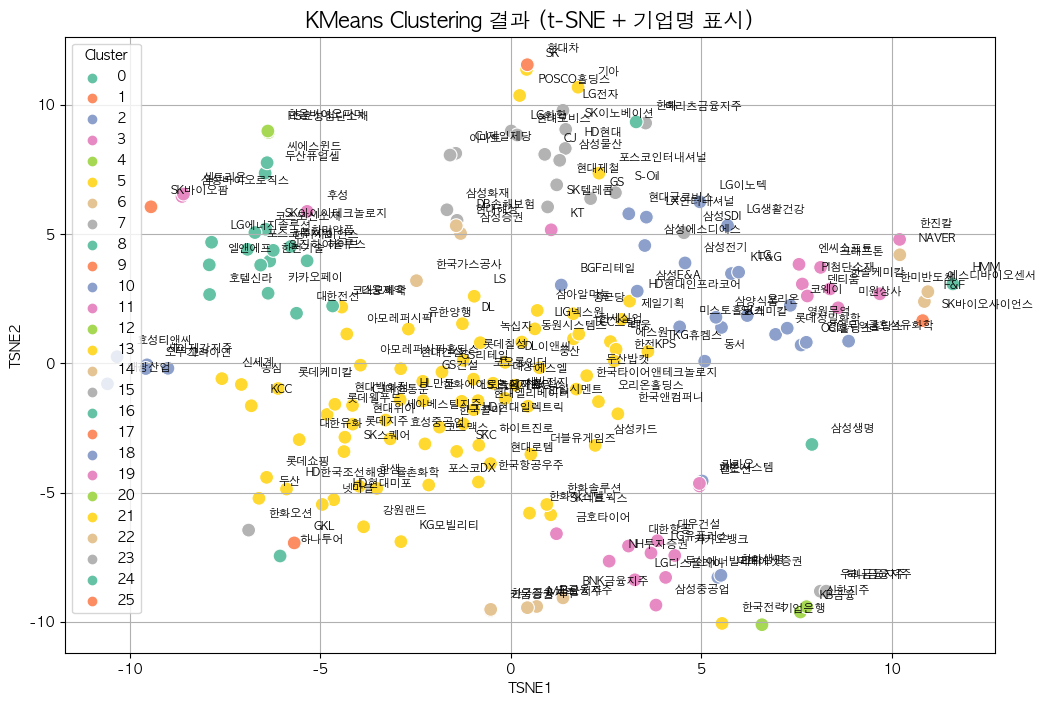

In [17]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2020_2022)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2020_2022.values,
    'Cluster': final_labels,  # ✅ 자동 선택된 클러스터 라벨 사용
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title(f"{best_method} Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2021-2023) - 그래프

In [18]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_scaled_df_2021_2023)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
2,영업이익,31.819736
3,당기순이익,30.261065
5,자본총계,13.197567
1,매출액,9.038077
8,이자발생부채,7.892144
4,자산총계,7.690996
6,자본금,4.701214
12,ROA(%),4.012625
18,발행주식수(보통주),3.956254
14,EPS(원),3.796829


In [19]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 피처들만 남긴 새로운 DataFrame 생성
X_scaled_df_2021_2023 = X_scaled_df_2021_2023[valid_features]


### 최적의 K 찾기 (2021-2023) - 자동화

Best K for KMeans (lowest DBI): 28 -> DBI = 0.6729
Best K for GMM (lowest DBI): 30 -> DBI = 0.8020
Best K for Spectral Clustering (lowest DBI): 24 -> DBI = 1.3787


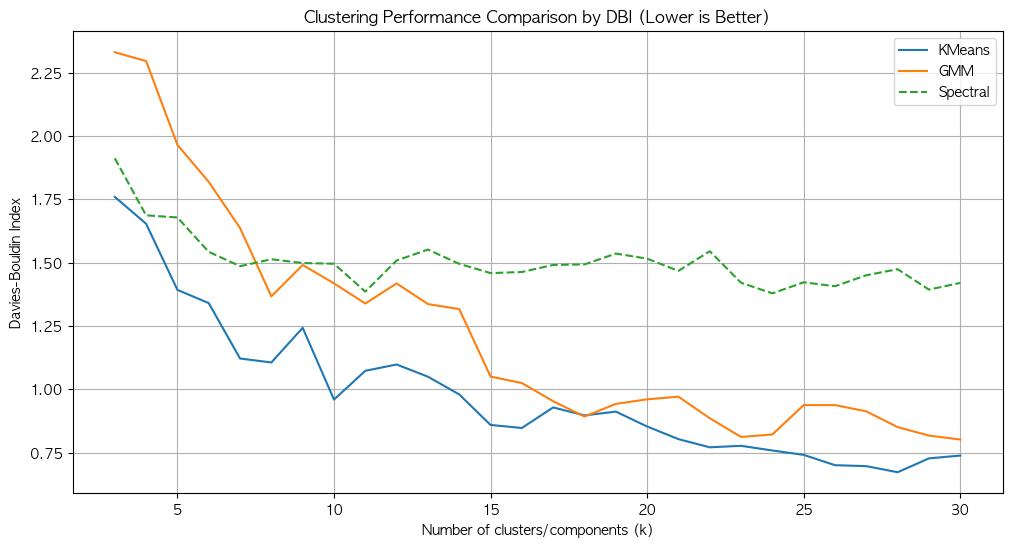

In [20]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2021_2023 = kmeans.fit_predict(X_scaled_2021_2023)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023))
    labels_kmeans_all[k] = kmeans_labels_2021_2023

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2021_2023 = gmm.fit_predict(X_scaled_df_2021_2023)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023))
    labels_gmm_all[k] = gmm_labels_2021_2023

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2021_2023 = spectral.fit_predict(X_scaled_df_2021_2023)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023))
        labels_spectral_all[k] = spectral_labels_2021_2023

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering 적용 및 비교

In [21]:
# # Window 2021-2023

# # K-means clustering
# # K-means는 k=28에서 가장 높은 점수를 보임
# kmeans = KMeans(n_clusters=28, random_state=42)
# kmeans_labels_2021_2023, kmeans_score_2021_2023 = evaluate_clustering(kmeans, X_scaled_df_2021_2023)

# # GMM
# # GMM은 k=28에서 가장 높은 점수를 보임
# gmm = GaussianMixture(n_components=28, random_state=42)
# gmm_labels_2021_2023, gmm_score_2021_2023 = evaluate_clustering(gmm, X_scaled_df_2021_2023, labels=gmm.fit_predict(X_scaled_df_2021_2023))

# # Spectral clustering
# # Spectral clustering은 거의 모든 k의 범위에서 평가가 낮게 나옴
# spectral = SpectralClustering(n_clusters=27, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2021_2023, spectral_score_2021_2023 = evaluate_clustering(spectral, X_scaled_df_2021_2023)


# # Davies-Bouldin Index 계산
# # 보통 0.5 ~ 1.0 사이면 괜찮은 클러스터링이라고 함. 실무에서 자주 나오는 수준
# kmeans_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023)
# gmm_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023)
# spectral_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023)

# # 결과 비교 출력
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2021_2023:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2021_2023:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2021_2023:.4f}")

# # # 결과 비교
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### 최종적으로 선택한 클러스터 결과 저장 (K-means)

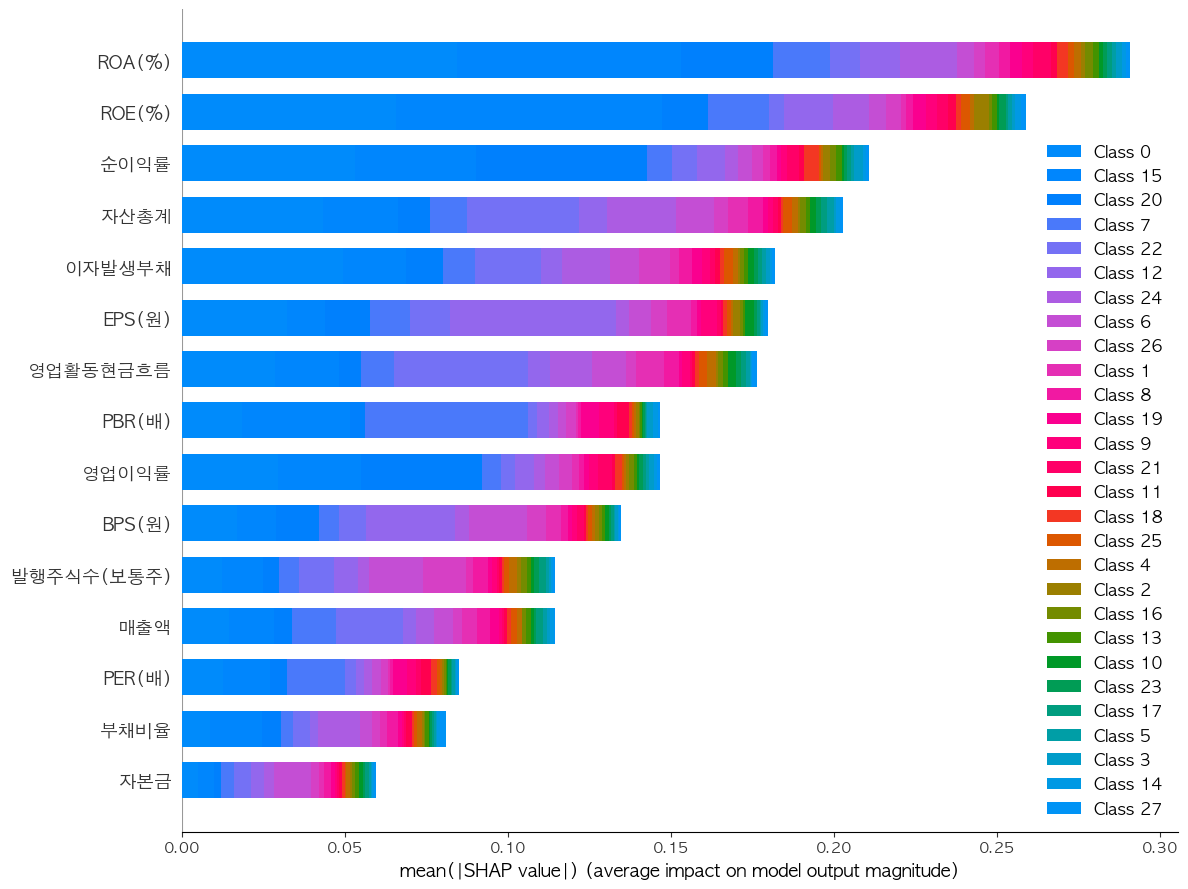

실제 사용된 클러스터 수: 28


In [22]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2021_2023['Cluster'] = final_labels

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2021_2023, final_labels)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2021_2023 = explainer.shap_values(X_scaled_df_2021_2023)

# ✅ summary plot
shap.summary_plot(shap_values_2021_2023, X_scaled_df_2021_2023, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels)))


In [23]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2021_2023 = {}
unique_clusters = np.unique(final_labels)

for cluster_id in unique_clusters:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2021_2023[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2021_2023.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2021_2023[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2021_2023.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters:
    shap_arr = cluster_shap_means_2021_2023[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2021_2023.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2021_2023.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 18,Class 19,Class 20,Class 21,Class 22,Class 23,Class 24,Class 25,Class 26,Class 27
매출액,0.021763,0.024600,0.010055,0.026744,0.012346,0.007695,0.003075,0.028464,0.012044,0.014279,...,0.044011,0.024645,0.014548,0.008506,0.017353,0.000764,0.003751,0.009573,0.003147,0.000694
자산총계,0.056487,0.097560,0.017843,0.005949,0.077369,0.046900,0.064245,0.011734,0.075666,0.004211,...,0.022810,0.010457,0.020446,0.017825,0.092258,0.040182,0.089066,0.052585,0.020375,0.011000
자본금,0.007779,0.003003,0.000664,0.000988,0.008960,0.006192,0.019002,0.001979,0.007652,0.001477,...,0.000610,0.000569,0.002490,0.000827,0.003384,0.006375,0.003853,0.002035,0.004350,0.002770
영업활동현금흐름,0.041254,0.084365,0.013896,0.010376,0.044933,0.002759,0.038948,0.008930,0.043934,0.011068,...,0.018472,0.003237,0.014443,0.009974,0.077998,0.032769,0.009876,0.043675,0.011889,0.005927
이자발생부채,0.065792,0.063988,0.032064,0.011418,0.088809,0.049602,0.076992,0.022723,0.082997,0.007216,...,0.026628,0.017260,0.025235,0.022281,0.079804,0.053007,0.089814,0.048514,0.048514,0.034980
영업이익률,0.044763,0.012552,0.000897,0.073608,0.005988,0.000182,0.015688,0.008370,0.018420,0.038086,...,0.016635,0.002278,0.087681,0.107778,0.011938,0.000040,0.016924,0.007506,0.006325,0.005132
순이익률,0.075749,0.024688,0.028690,0.117085,0.020863,0.005835,0.022612,0.027301,0.025647,0.048517,...,0.202042,0.012862,0.139724,0.150134,0.020105,0.012732,0.025347,0.003128,0.018636,0.014993
ROE(%),0.087327,0.023368,0.093632,0.014194,0.034373,0.052304,0.035515,0.077193,0.029679,0.041628,...,0.028760,0.081137,0.029297,0.013052,0.038406,0.050429,0.043892,0.054735,0.071714,0.102124
ROA(%),0.124312,0.045070,0.053073,0.039331,0.045352,0.054090,0.054246,0.071528,0.042462,0.046794,...,0.083209,0.073942,0.066143,0.067539,0.048666,0.044840,0.084814,0.045441,0.071889,0.099117
부채비율,0.013568,0.000860,0.016114,0.005738,0.004466,0.006055,0.005736,0.005973,0.005491,0.001044,...,0.001320,0.003120,0.016244,0.006357,0.004625,0.004182,0.022299,0.001000,0.005284,0.000745



Class 0에 중요한 특성 순위:
1. ROA(%): 0.124312
2. ROE(%): 0.087327
3. 순이익률: 0.075749
4. 이자발생부채: 0.065792
5. 자산총계: 0.056487
6. EPS(원): 0.046213
7. 영업이익률: 0.044763
8. 영업활동현금흐름: 0.041254
9. PBR(배): 0.026926
10. BPS(원): 0.024719
11. 매출액: 0.021763
12. 발행주식수(보통주): 0.017890
13. PER(배): 0.016598
14. 부채비율: 0.013568
15. 자본금: 0.007779

Class 1에 중요한 특성 순위:
1. 자산총계: 0.097560
2. 영업활동현금흐름: 0.084365
3. 이자발생부채: 0.063988
4. EPS(원): 0.052763
5. BPS(원): 0.048167
6. ROA(%): 0.045070
7. 순이익률: 0.024688
8. 매출액: 0.024600
9. ROE(%): 0.023368
10. 영업이익률: 0.012552
11. PBR(배): 0.005625
12. 발행주식수(보통주): 0.005199
13. PER(배): 0.003575
14. 자본금: 0.003003
15. 부채비율: 0.000860

Class 2에 중요한 특성 순위:
1. ROE(%): 0.093632
2. EPS(원): 0.069509
3. ROA(%): 0.053073
4. BPS(원): 0.040490
5. 이자발생부채: 0.032064
6. 순이익률: 0.028690
7. 발행주식수(보통주): 0.023740
8. 자산총계: 0.017843
9. 부채비율: 0.016114
10. 영업활동현금흐름: 0.013896
11. 매출액: 0.010055
12. PER(배): 0.005684
13. PBR(배): 0.001092
14. 영업이익률: 0.000897
15. 자본금: 0.000664

Class 3에 중요한 특성 순위:
1. 순이익률: 0.117085
2

### 위에 결과를 보면 각 class 별로 잘 주요한 feature가 나온 것을 확인할 수 있다.

In [24]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2021_2023[final_labels == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
BGF리테일, DL이앤씨, HD현대인프라코어, HD현대일렉트릭, HS효성첨단소재, KG모빌리티, LG생활건강, LIG넥스원, LS, LS ELECTRIC, LX인터내셔널, PI첨단소재, SK케미칼, TKG휴켐스, 강원랜드, 농심, 대웅, 대웅제약, 대한전선, 동원시스템즈, 두산밥캣, 롯데칠성, 미스토홀딩스, 삼성E&A, 삼성에스디에스, 삼성전기, 세방전지, 세아베스틸지주, 에스엘, 에스원, 오리온홀딩스, 유한양행, 제일기획, 코스맥스, 포스코인터내셔널, 풍산, 한국타이어앤테크놀로지, 한국항공우주, 한미사이언스, 한미약품, 한세실업, 한일시멘트, 한전KPS, 한화시스템, 한화에어로스페이스, 현대글로비스, 현대로템, 현대엘리베이터, 현대해상, 효성중공업
[클러스터 1에 속한 종목들]:
LG화학, POSCO홀딩스, 현대모비스
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
한미반도체
[클러스터 4에 속한 종목들]:
우리금융지주
[클러스터 5에 속한 종목들]:
한국전력
[클러스터 6에 속한 종목들]:
LG유플러스, NH투자증권, 대우건설, 대한항공, 두산에너빌리티, 미래에셋증권, 카카오뱅크, 한화생명
[클러스터 7에 속한 종목들]:
HD현대중공업, SK바이오사이언스, SK아이이테크놀로지, TCC스틸, 두산퓨얼셀, 삼아알미늄, 씨에스윈드, 엘앤에프, 일진하이솔루스, 코스모신소재, 코스모화학, 포스코퓨처엠, 하이브, 한전기술, 호텔신라, 후성
[클러스터 8에 속한 종목들]:
KB금융, 신한지주, 하나금융지주
[클러스터 9에 속한 종목들]:
SK바이오팜, 포스코DX
[클러스터 10에 속한 종목들]:
현대차
[클러스터 11에 속한 종목들]:
에코프로머티
[클러스터 12에 속한 종목들]:
CJ제일제당, LG이노텍, NAVER, OCI홀딩스, 고려아연, 금호석유화학, 삼성SDI, 삼성화재, 세아제강지주, 신세계, 영원무역홀딩스, 오뚜기, 효성티앤씨
[클러스터 13에 속한 종목들]:
기업은행
[클러스터 14에 속한 종목들]

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

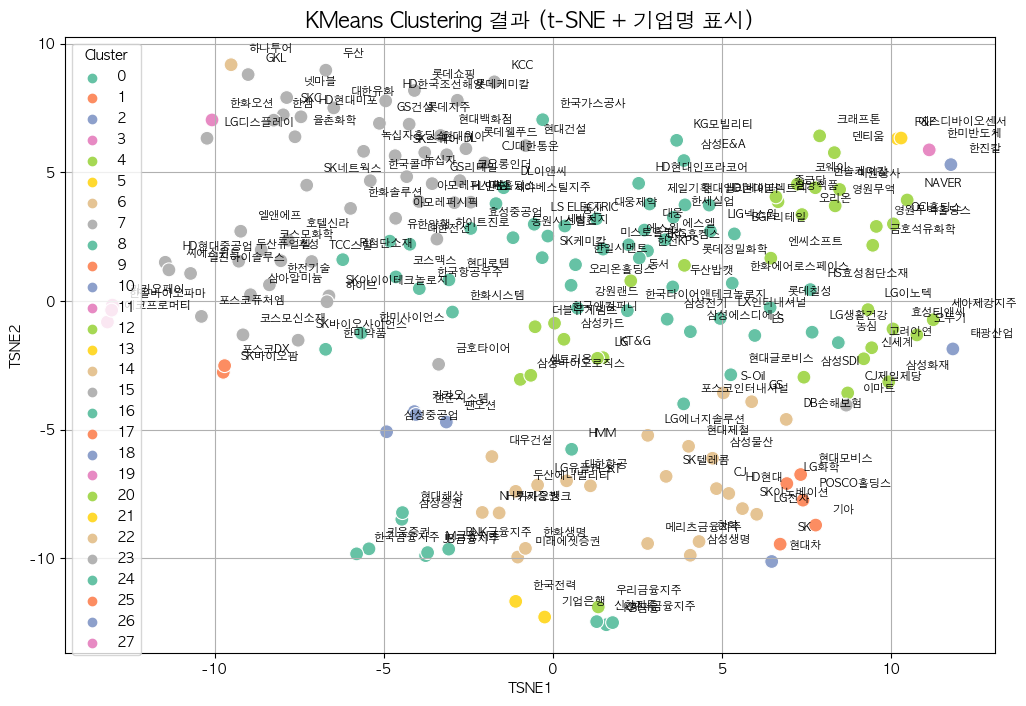

In [25]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2021_2023)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2021_2023.values,
    'Cluster': final_labels,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2022-2024) - 그래프

In [26]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_scaled_df_2022_2024)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
2,영업이익,32.017576
3,당기순이익,28.701173
5,자본총계,15.183636
1,매출액,12.047871
8,이자발생부채,8.734619
4,자산총계,7.836410
12,ROA(%),7.623210
11,ROE(%),5.614654
14,EPS(원),5.285805
6,자본금,4.632521


In [27]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 피처들만 남긴 새로운 DataFrame 생성
X_scaled_df_2022_2024 = X_scaled_df_2022_2024[valid_features]


### 최적의 K 찾기 (2022-2024) - 자동화

Best K for KMeans (lowest DBI): 22 -> DBI = 0.8120
Best K for GMM (lowest DBI): 19 -> DBI = 0.9126
Best K for Spectral Clustering (lowest DBI): 12 -> DBI = 1.3708


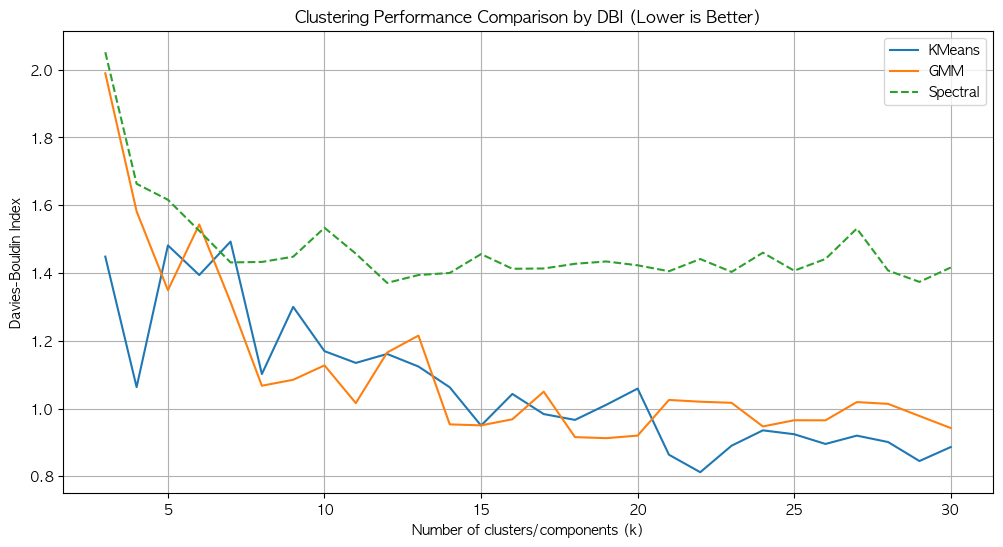

In [28]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2022_2024 = kmeans.fit_predict(X_scaled_2022_2024)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024))
    labels_kmeans_all[k] = kmeans_labels_2022_2024

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2022_2024 = gmm.fit_predict(X_scaled_df_2022_2024)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024))
    labels_gmm_all[k] = gmm_labels_2022_2024

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2022_2024 = spectral.fit_predict(X_scaled_df_2022_2024)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024))
        labels_spectral_all[k] = spectral_labels_2022_2024

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering 적용 및 비교

In [29]:
# # Window 2021-2023

# # K-means clustering
# # K-means는 k=3에서 가장 높은 점수를 보임
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans_labels_2022_2024, kmeans_score_2022_2024 = evaluate_clustering(kmeans, X_scaled_df_2022_2024)

# # GMM
# # GMM은 k=23에서 가장 높은 점수를 보임
# gmm = GaussianMixture(n_components=23, random_state=42)
# gmm_labels_2022_2024, gmm_score_2022_2024 = evaluate_clustering(gmm, X_scaled_df_2022_2024, labels=gmm.fit_predict(X_scaled_df_2022_2024))

# # Spectral clustering
# # Spectral clustering은 거의 모든 k의 범위에서 평가가 낮게 나옴
# spectral = SpectralClustering(n_clusters=28, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2022_2024, spectral_score_2022_2024 = evaluate_clustering(spectral, X_scaled_df_2022_2024)


# # Davies-Bouldin Index 계산
# # 보통 0.5 ~ 1.0 사이면 괜찮은 클러스터링이라고 함. 실무에서 자주 나오는 수준
# kmeans_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024)
# gmm_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024)
# spectral_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024)

# # 결과 비교 출력
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2022_2024:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2022_2024:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2022_2024:.4f}")

# # # 결과 비교
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### 최종적으로 선택한 클러스터 결과 저장 (K-means)

### SHAP 해석

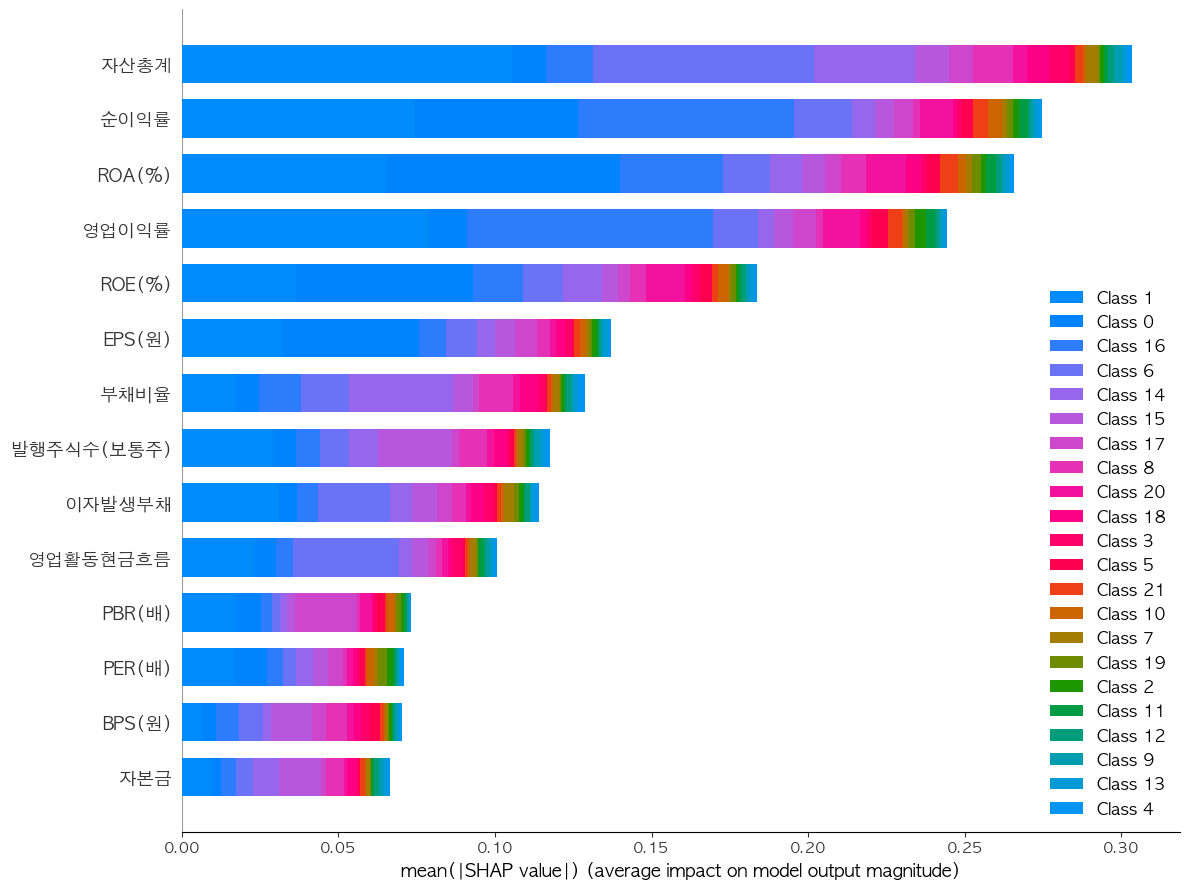

실제 사용된 클러스터 수: 22


In [30]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2022_2024['Cluster'] = final_labels

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2022_2024, final_labels)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2022_2024 = explainer.shap_values(X_scaled_df_2022_2024)

# ✅ summary plot
shap.summary_plot(shap_values_2022_2024, X_scaled_df_2022_2024, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels)))


In [31]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2022_2024 = {}
unique_clusters = np.unique(final_labels)

for cluster_id in unique_clusters:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2022_2024[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2022_2024.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2022_2024[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2022_2024.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters:
    shap_arr = cluster_shap_means_2022_2024[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2022_2024.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2022_2024.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 12,Class 13,Class 14,Class 15,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21
자산총계,0.023723,0.002001,0.002372,0.066170,0.031621,0.002247,0.017081,0.021477,0.027382,0.013202,...,0.030722,0.094701,0.019681,0.004120,0.002841,0.005360,0.035047,0.009308,0.003260,0.003923
자본금,0.007148,0.001378,0.001534,0.001881,0.007704,0.000231,0.002422,0.001207,0.007722,0.002176,...,0.007752,0.035204,0.001685,0.008517,0.000627,0.003965,0.004555,0.010783,0.000672,0.000279
영업활동현금흐름,0.014675,0.001772,0.001042,0.049322,0.000766,0.000865,0.016634,0.002753,0.005930,0.015964,...,0.002577,0.050926,0.005228,0.006227,0.001189,0.004067,0.012091,0.003864,0.000859,0.000976
이자발생부채,0.012674,0.001597,0.006997,0.041108,0.015975,0.001358,0.006466,0.016578,0.007521,0.001571,...,0.014760,0.067602,0.004429,0.004891,0.002025,0.004643,0.018557,0.039294,0.002757,0.001553
영업이익률,0.032147,0.005782,0.018850,0.007369,0.007212,0.014059,0.005641,0.005248,0.010186,0.007019,...,0.009940,0.022688,0.007493,0.008989,0.012904,0.008799,0.010459,0.001033,0.013585,0.013077
순이익률,0.134785,0.036541,0.034572,0.042860,0.021127,0.028589,0.036223,0.029525,0.030373,0.031706,...,0.022983,0.091262,0.031951,0.045455,0.035654,0.041906,0.025715,0.069327,0.033374,0.035421
ROE(%),0.144814,0.039166,0.036642,0.050607,0.032737,0.031580,0.039659,0.029850,0.036820,0.029269,...,0.032266,0.074199,0.036739,0.050597,0.037082,0.052499,0.031296,0.047426,0.034287,0.037568
ROA(%),0.189726,0.057156,0.056753,0.064134,0.021484,0.045871,0.043994,0.043467,0.021189,0.043634,...,0.021045,0.104449,0.033882,0.059467,0.054391,0.080475,0.022083,0.116947,0.052382,0.056334
부채비율,0.017608,0.002013,0.000676,0.002076,0.022527,0.002028,0.004211,0.003213,0.024413,0.002212,...,0.022142,0.045884,0.020280,0.010532,0.002660,0.002670,0.025840,0.005576,0.003436,0.001992
EPS(원),0.110246,0.030186,0.046941,0.041416,0.021133,0.022728,0.033750,0.024829,0.022335,0.025132,...,0.021088,0.056088,0.028874,0.039847,0.029889,0.032321,0.023194,0.061398,0.028949,0.029672



Class 0에 중요한 특성 순위:
1. ROA(%): 0.189726
2. ROE(%): 0.144814
3. 순이익률: 0.134785
4. EPS(원): 0.110246
5. 영업이익률: 0.032147
6. PER(배): 0.031514
7. 자산총계: 0.023723
8. PBR(배): 0.018643
9. 부채비율: 0.017608
10. 발행주식수(보통주): 0.016548
11. 영업활동현금흐름: 0.014675
12. 이자발생부채: 0.012674
13. BPS(원): 0.011653
14. 자본금: 0.007148

Class 1에 중요한 특성 순위:
1. ROA(%): 0.057156
2. ROE(%): 0.039166
3. 순이익률: 0.036541
4. EPS(원): 0.030186
5. 영업이익률: 0.005782
6. PER(배): 0.004054
7. PBR(배): 0.003264
8. 발행주식수(보통주): 0.002017
9. 부채비율: 0.002013
10. 자산총계: 0.002001
11. BPS(원): 0.001893
12. 영업활동현금흐름: 0.001772
13. 이자발생부채: 0.001597
14. 자본금: 0.001378

Class 2에 중요한 특성 순위:
1. ROA(%): 0.056753
2. EPS(원): 0.046941
3. ROE(%): 0.036642
4. 순이익률: 0.034572
5. 영업이익률: 0.018850
6. PER(배): 0.013302
7. 이자발생부채: 0.006997
8. BPS(원): 0.005415
9. 발행주식수(보통주): 0.004689
10. 자산총계: 0.002372
11. PBR(배): 0.002301
12. 자본금: 0.001534
13. 영업활동현금흐름: 0.001042
14. 부채비율: 0.000676

Class 3에 중요한 특성 순위:
1. 자산총계: 0.066170
2. ROA(%): 0.064134
3. ROE(%): 0.050607
4. 영업활동현금흐름: 0.

### 위에 결과를 보면 각 class 별로 잘 주요한 feature가 나온 것을 확인할 수 있다.

In [32]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2022_2024[final_labels == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
DL, GS건설, GS리테일, HD현대미포, KG모빌리티, LG디스플레이, SKC, SK네트웍스, SK바이오사이언스, 넷마블, 녹십자, 녹십자홀딩스, 대한유화, 두산, 두산퓨얼셀, 롯데쇼핑, 롯데지주, 롯데케미칼, 삼아알미늄, 엘앤에프, 율촌화학, 이마트, 일진하이솔루스, 카카오, 코스모화학, 한화솔루션, 한화오션, 현대건설, 현대백화점, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
BGF리테일, CJ대한통운, DL이앤씨, GKL, HD현대인프라코어, HD현대중공업, HL만도, HS효성첨단소재, KCC, LG생활건강, LG이노텍, LIG넥스원, LS, LS ELECTRIC, LX인터내셔널, PI첨단소재, SK아이이테크놀로지, SK케미칼, TCC스틸, TKG휴켐스, 고려아연, 금호석유화학, 농심, 대상, 대웅, 대웅제약, 대한전선, 동원시스템즈, 롯데웰푸드, 롯데정밀화학, 롯데칠성, 미스토홀딩스, 삼성에스디에스, 삼성전기, 세방전지, 세아베스틸지주, 세아제강지주, 신세계, 씨에스윈드, 아모레퍼시픽, 아모레퍼시픽홀딩스, 에스엘, 에스원, 엔씨소프트, 오뚜기, 유한양행, 제일기획, 코스맥스, 코오롱인더, 포스코인터내셔널, 풍산, 하이브, 하이트진로, 한국콜마, 한국항공우주, 한미사이언스, 한샘, 한세실업, 한전기술, 한화시스템, 현대글로비스, 현대로템, 현대엘리베이터, 현대위아, 효성중공업, 효성티앤씨
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
POSCO홀딩스, SK
[클러스터 4에 속한 종목들]:
우리금융지주
[클러스터 5에 속한 종목들]:
SK바이오팜, 한미반도체
[클러스터 6에 속한 종목들]:
CJ, CJ제일제당, GS, HD한국조선해양, HD현대, KT, LG에너지솔루션, LG전자, LG화학, S-Oil, SK이노베이션, SK텔레콤, 삼성SDI, 삼성물산, 한국가스공사, 한화, 현대모비스, 현대제철
[클러스터 7에 속한 종목들]:
현대차
[클러스터 8에 속한 종목들]:
BNK금융지주, NH투자

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

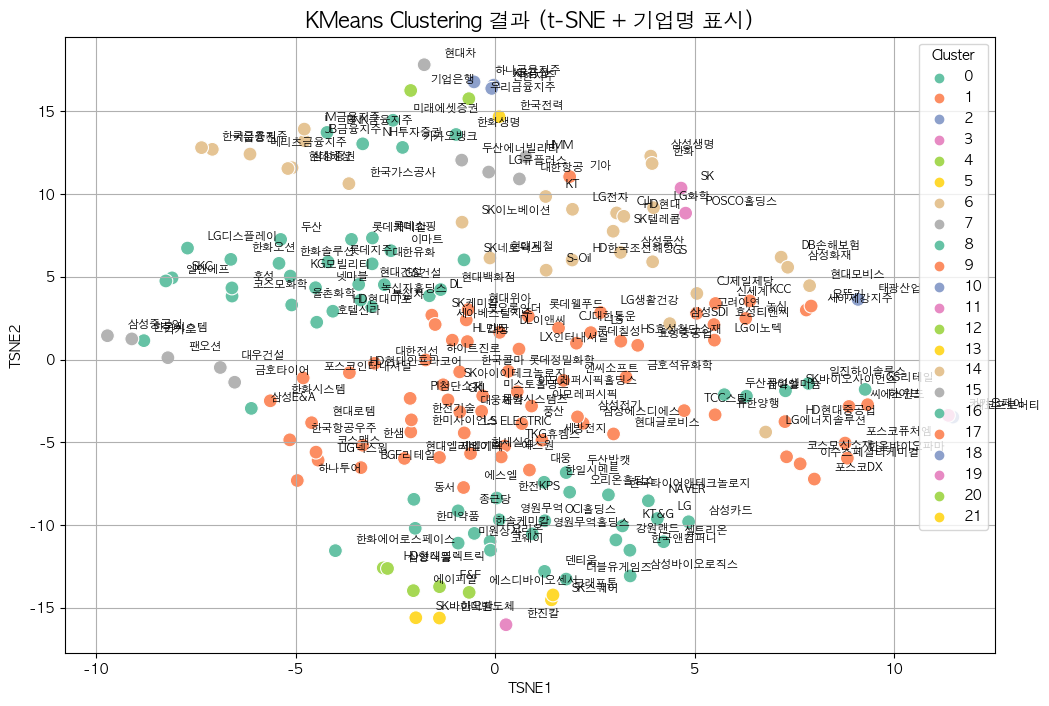

In [33]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2022_2024)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2022_2024.values,
    'Cluster': final_labels,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# 포트폴리오 최적화

## Inter Cluster Portfolio vs. Random Sampling Portfolio

### Evaluation Using Sharpe Ratio, Sortino Ratio, and CVaR

In [49]:
#자산들 목록 보기
import FinanceDataReader as fdr
from tqdm import tqdm
import datetime

# 1. 세 윈도우에서 기업명 합집합 만들기
companies_2020_2022 = set(df_2020_2022['기업명_그룹'])
companies_2021_2023 = set(df_2021_2023['기업명_그룹'])
companies_2022_2024 = set(df_2022_2024['기업명_그룹'])

all_companies = companies_2020_2022.union(companies_2021_2023).union(companies_2022_2024)
company_list = sorted(all_companies)

krx_listed = fdr.StockListing('KRX')

# 기업명과 티커 매핑
company_ticker_map = {}
for name in company_list:
    match = krx_listed[krx_listed['Name'] == name]
    if not match.empty:
        code = match.iloc[0]['Code']
        company_ticker_map[name] = code
    else:
        print(f"매칭되지 않은 기업명: {name}")

# 매핑 결과 확인
print("매핑된 기업 수:", len(company_ticker_map))


매핑된 기업 수: 195


In [53]:
start_date = '2020-01-01'
end_date = '2024-12-31'

# 종가 데이터를 담을 딕셔너리
close_price_dict = {}
failed_companies = []

# tqdm으로 진행 상황 출력
for name, ticker in tqdm(company_ticker_map.items(), desc="📈 종가 수집 중"):
    try:
        df = fdr.DataReader(ticker, start=start_date, end=end_date)
        if 'Close' in df.columns and not df['Close'].isna().all():
            close_price_dict[name] = df['Close']
        else:
            failed_companies.append(name)
    except Exception as e:
        failed_companies.append(name)
        print(f"{name} 데이터 수집 실패: {e}")

# 딕셔너리를 하나의 데이터프레임으로 결합
price_df = pd.DataFrame(close_price_dict)

📈 종가 수집 중: 100%|██████████| 195/195 [00:31<00:00,  6.14it/s]


In [54]:
price_df

,BGF리테일,BNK금융지주,CJ,CJ대한통운,CJ제일제당,DB손해보험,DL,DL이앤씨,F&F,GKL,...,현대백화점,현대엘리베이터,현대위아,현대제철,현대차,현대해상,호텔신라,효성중공업,효성티앤씨,후성
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,168500,7470,93800,152500,245000,50100,79337,NaN,NaN,19450,...,85900,45083,48950,31200,118000,25900,94000,26900,152500,7940
2020-01-03,169000,7490,92600,148000,241000,50800,79337,NaN,NaN,19600,...,85600,45083,47800,30800,116000,25450,95300,27200,152000,8018
2020-01-06,166500,7350,90300,147000,233500,50200,75994,NaN,NaN,19050,...,84000,43416,46750,29650,116000,25350,94900,26100,149500,7783
2020-01-07,169500,7430,91100,147000,234000,49750,76988,NaN,NaN,20000,...,88900,43682,46250,29500,115500,25600,99400,26200,150500,7891
2020-01-08,169500,7330,90900,143500,229500,48550,74639,NaN,NaN,19700,...,87300,41348,44750,28200,112000,25050,97300,24550,145000,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,107700,10630,107900,82500,265000,104700,33800,33100.0,54900.0,11350,...,48800,59100,39350,21750,215000,25250,38250,424500,239500,5110
2024-12-24,107000,10730,102200,82200,264500,105600,33800,32950.0,53700.0,11350,...,49100,59500,39250,21700,216500,25600,38250,393000,245500,5000
2024-12-26,105400,10590,102100,81200,261000,105300,33550,32400.0,54000.0,11340,...,48150,58600,39000,21350,217500,25450,37550,389500,241500,4945


In [80]:
# 1. 일일 로그 수익률 계산
# # 수익률: log(P_t / P_{t-1})
# log_returns_df = np.log(price_df / price_df.shift(1)).dropna()

# # 2. 인덱스를 datetime으로 변환 (필요 시)
# log_returns_df.index = pd.to_datetime(log_returns_df.index)

# 3. 연도 필터링 함수
price_2020_2022 = price_df.loc["2020-01-01":"2022-12-31"]
price_2021_2023 = price_df.loc["2021-01-01":"2023-12-31"]
price_2022_2024 = price_df.loc["2022-01-01":"2024-12-31"]

# 5. 저장
price_df.to_csv("../csv/log_returns_total.csv")

price_2020_2022 = price_2020_2022.astype(float)
price_2021_2023 = price_2021_2023.astype(float)
price_2022_2024 = price_2022_2024.astype(float)

log_ret_2020_2022 = np.log(price_2020_2022 / price_2020_2022.shift(1))
log_ret_2020_2022 = log_ret_2020_2022.bfill()

log_ret_2021_2023 = np.log(price_2021_2023 / price_2021_2023.shift(1))
log_ret_2021_2023 = log_ret_2021_2023.bfill()

log_ret_2022_2024 = np.log(price_2022_2024 / price_2022_2024.shift(1))
log_ret_2022_2024 = log_ret_2022_2024.bfill()

log_ret_2020_2022.to_csv("../csv/log_return_2020_2022.csv", encoding="utf-8-sig")
log_ret_2021_2023.to_csv("../csv/log_return_2021_2023.csv", encoding="utf-8-sig")
log_ret_2022_2024.to_csv("../csv/log_return_2022_2024.csv", encoding="utf-8-sig")


In [83]:
log_ret_2020_2022

,BGF리테일,BNK금융지주,CJ,CJ대한통운,CJ제일제당,DB손해보험,DL,DL이앤씨,F&F,GKL,...,현대백화점,현대엘리베이터,현대위아,현대제철,현대차,현대해상,호텔신라,효성중공업,효성티앤씨,후성
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.002963,0.002674,-0.012876,-0.029952,-0.016461,0.013875,0.000000,-0.007878,0.075838,0.007682,...,-0.003499,0.000000,-0.023774,-0.012903,-0.017094,-0.017527,0.013735,0.011091,-0.003284,0.009776
2020-01-03,0.002963,0.002674,-0.012876,-0.029952,-0.016461,0.013875,0.000000,-0.007878,0.075838,0.007682,...,-0.003499,0.000000,-0.023774,-0.012903,-0.017094,-0.017527,0.013735,0.011091,-0.003284,0.009776
2020-01-06,-0.014903,-0.018868,-0.025152,-0.006780,-0.031615,-0.011881,-0.043050,-0.007878,0.075838,-0.028462,...,-0.018868,-0.037677,-0.022211,-0.038053,0.000000,-0.003937,-0.004206,-0.041282,-0.016584,-0.029747
2020-01-07,0.017858,0.010826,0.008820,0.000000,0.002139,-0.009005,0.012995,-0.007878,0.075838,0.048665,...,0.056695,0.006108,-0.010753,-0.005072,-0.004320,0.009814,0.046328,0.003824,0.006667,0.013781
2020-01-08,0.000000,-0.013550,-0.002198,-0.024098,-0.019418,-0.024416,-0.030986,-0.007878,0.075838,-0.015114,...,-0.018162,-0.054912,-0.032970,-0.045068,-0.030772,-0.021719,-0.021353,-0.065048,-0.037229,-0.049487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.014423,-0.008242,-0.009479,-0.002144,0.000000,0.002941,-0.009725,0.000000,-0.017762,-0.010929,...,-0.018503,-0.019248,-0.026719,-0.010761,-0.009509,-0.019576,0.000000,-0.014982,0.020648,-0.047719
2022-12-26,-0.009732,-0.001380,-0.011976,0.002144,-0.011591,-0.002941,0.004874,-0.009530,0.024780,-0.005510,...,0.001696,0.008795,0.003861,0.007698,0.006349,0.019576,-0.021291,0.018692,0.000000,0.004359
2022-12-27,0.019371,0.000000,0.003608,0.014878,-0.005195,0.002941,0.009677,0.008174,0.027588,0.027250,...,0.006757,-0.001753,-0.001929,0.003063,0.000000,-0.013008,0.048187,0.035176,0.020230,0.013233


In [84]:
log_ret_2020_2022.index = pd.to_datetime(log_ret_2020_2022.index)

start_date = log_ret_2020_2022.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2020_2022.index.max()

returns_in_sample = log_ret_2020_2022.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample = log_ret_2020_2022.loc[cutoff_date : end_date]

returns_in_sample.shape, returns_out_sample.shape, cutoff_date

((496, 195), (246, 195), Timestamp('2022-01-02 00:00:00'))